**Import Numpy, Pandas, Matplotlib, and Seaborn**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

**Reading Data Using Pandas**

In [3]:
df = pd.DataFrame(pd.read_csv('/content/train (1).csv'))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Checking All Null Values**

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Separation Of Columns Which Have More Than 25% Of The Null Values**

In [5]:
del_col = df.isnull().sum()[df.isnull().sum()>(25/100 * df.shape[0])]
del_col
del_col.index
df.drop(del_col.index, axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

**Fill All Null Values Of "Age" Column**

In [7]:
df.fillna(df.mean(),inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

**Information Of Embarked Column**

In [8]:
df["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

**Fill The All Value In Embarked Column**

In [9]:
df.fillna('S', axis=1, inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Check Co-relation Of Columns On Each Others**

In [10]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


**New Column Added Family size**

In [11]:
df['familysize']=df['SibSp']+df['Parch']
df.drop(['SibSp','Parch'], axis=1, inplace=True)
df.corr()

,PassengerId,Survived,Pclass,Age,Fare,familysize
PassengerId,1.000000,-0.005007,-0.035144,0.033207,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.069809,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.331339,-0.549500,0.065997
Age,0.033207,-0.069809,-0.331339,1.000000,0.091566,-0.248512
Fare,0.012658,0.257307,-0.549500,0.091566,1.000000,0.217138
familysize,-0.040143,0.016639,0.065997,-0.248512,0.217138,1.000000


**New Column Added "Alone"**

In [12]:
df['Alone']=[0 if df['familysize'][i]>0 else 1 for i in df.index]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,familysize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,1


**Dependancy Of Survived Column On Alone Column**

In [13]:
df.groupby(['Alone'])['Survived'].mean()

Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

**Dependancy Of Fare Column On Alone Column**

In [14]:
df[['Alone','Fare']].corr()

,Alone,Fare
Alone,1.000000,-0.271832
Fare,-0.271832,1.000000


**Change In  Column 'Sex' 0=Male, 1=Female**

In [15]:
df['Sex']=[0 if df['Sex'][i]=='male' else 1 for i in df.index]
df.groupby(['Sex'])['Survived'].mean()

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

 
**Dependancy Of Embarked Column On Survived Column**

In [16]:
df.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

**Chart Of Sex Column and Embarked column**

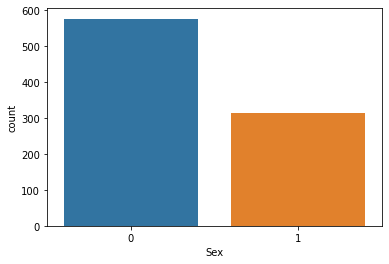

In [17]:
sb.countplot(data=df, x='Sex'); #0=Male, 1=Female

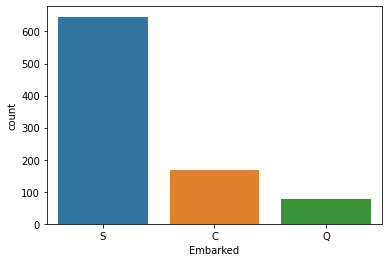

In [18]:
sb.countplot(data=df, x='Embarked');

**Survived Column Pie chart**

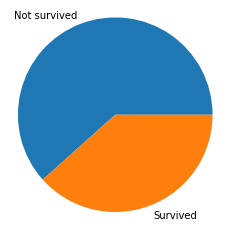

In [19]:
sorted_counts=df['Survived'].value_counts()
plt.pie(sorted_counts,labels=['Not survived','Survived']);
plt.axis('square');

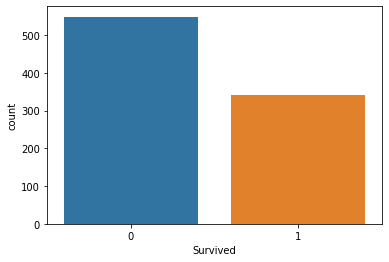

In [20]:
sb.countplot(data=df, x='Survived');

 
**1.   Female Passengers Are Less Than Male Passengers**
 
**2.  Female Passengers Were Prioritized Over Men Passenges.**
 
**3. If The Person Is Alone Then He/She Has Less Chance Of Survival**
 
**4. People Who Boarded At Cherbourg Station Were Survived More Then Others Passengers**
 
**5. Female Passengers Have More Chances Of Surviving Than Male Passengers**
 
**6.People With High Class Or Rich People Have Higher Survival Rate Than Others.**